XOR Problem Results:
Input -> Expected -> Predicted
[0. 0.] -> 0 -> 0
[0. 1.] -> 1 -> 1
[1. 0.] -> 1 -> 1
[1. 1.] -> 0 -> 0
Accuracy: 100.0%


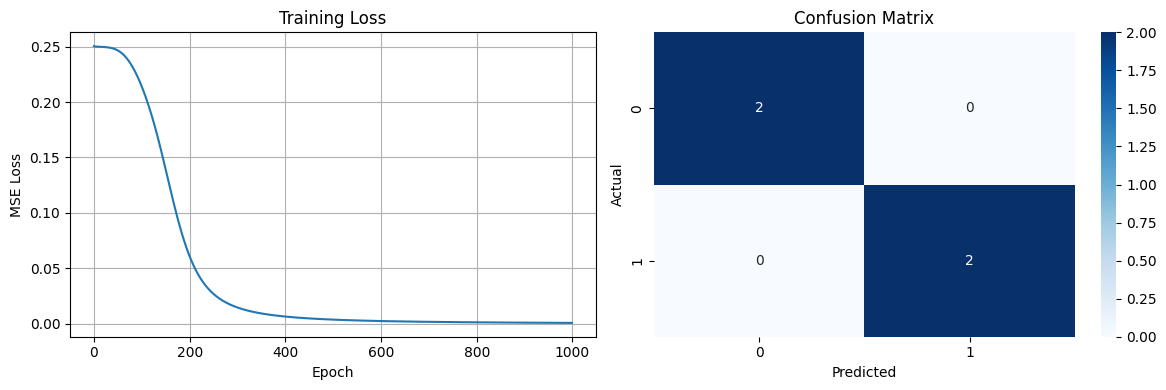

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Data
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Model
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Hidden layer: 2 -> 4
        self.output = nn.Linear(4, 1)  # Output layer: 4 -> 1
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

model = XORNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
losses = []
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Predictions
with torch.no_grad():
    predictions = model(X)
    predictions_binary = (predictions > 0.5).float()

# Results
print("XOR Problem Results:")
print("Input -> Expected -> Predicted")
for i in range(len(X)):
    print(f"{X[i].numpy()} -> {int(y[i].item())} -> {int(predictions_binary[i].item())}")

accuracy = (predictions_binary == y).float().mean().item()
print(f"Accuracy: {accuracy*100:.1f}%")

# Loss Graph
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)

# Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y.numpy().flatten(), predictions_binary.numpy().flatten())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()